# ASSIGNMENT: NIR-SPECTRA

## 1) Definition of Tast: Predicting the quality of interest from the spectral data

Near infra-red spectroscopy is a techinique used in a number of industries, including food, and agrochemical 
quality control. The goal is to determine a quality of interest, for instance, protein content of milk, from 
spectrometer measurements

More information [Near-Infrared-Spectroscopy](https://en.wikipedia.org/wiki/Near-infrared_spectroscopy)

The data for this assignment consists of following consists of the following columns (in this particular order):
>* Sample number
* The quantity to predict
* The rest of the columns are the spectral data


**Your task:**
>* Perform an explatorory analysis of the data
* Develop a predictive model for the second column and report its accuracy in terms of R-squared and RMSE error
* Explain your model

We suggest to use Jupyter notebook for this assignment

## 2) Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

## 3) Downloading the data

This cell below downloads the data from the github project and then extracts 
extracts the csv file and save it into the data folder
ONLY ONCE TO BE EXECUTED!!!

In [ ]:
%mkdir data
!wget -O - https://github.com/datamole-ai/NirSpectra/archive/master.zip | jar xv

import zipfile
with zipfile.ZipFile("NirSpectra-master/cal 2018.csv.zip","r") as zf:
    zf.extractall('data')    

# 4) Reading the Data and first explaratory analysis of the data

In [2]:
df=pd.read_csv("data/cal 2018.csv",sep=";",header=None)

In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
0,1,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
1,2,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574
2,3,12.000000,0.611137,0.609566,0.607430,0.604767,0.601434,0.597316,0.592598,0.586992,...,0.116174,0.115513,0.114890,0.114354,0.113720,0.113223,0.112702,0.112212,0.111764,0.111432
3,4,13.844976,0.342604,0.343687,0.344696,0.345664,0.346574,0.347402,0.348187,0.348870,...,0.084568,0.084324,0.084156,0.084029,0.083939,0.083858,0.083770,0.083700,0.083641,0.083626
4,5,19.299999,0.760703,0.760871,0.761004,0.761058,0.761009,0.760830,0.760615,0.760404,...,0.309897,0.307698,0.305618,0.303555,0.301619,0.299720,0.297918,0.296330,0.294762,0.293355


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Columns: 682 entries, 0 to 681
dtypes: float64(681), int64(1)
memory usage: 20.3 MB


In [11]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
count,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,...,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000,3908.000000
mean,1954.500000,31.247135,0.673552,0.673042,0.672289,0.671280,0.669945,0.668317,0.666428,0.664173,...,0.180276,0.179063,0.177920,0.176871,0.175921,0.175057,0.174249,0.173527,0.172905,0.172366
std,1128.286754,20.044317,0.177404,0.176938,0.176444,0.175918,0.175353,0.174777,0.174194,0.173637,...,0.099334,0.098570,0.097812,0.097090,0.096401,0.095744,0.095132,0.094552,0.094031,0.093534
min,1.000000,3.060644,0.225217,0.226202,0.227226,0.228200,0.229130,0.230069,0.230942,0.231759,...,0.031046,0.030999,0.030906,0.030781,0.030699,0.030650,0.030605,0.030532,0.030445,0.030424
25%,977.750000,13.096103,0.561772,0.560873,0.560031,0.558322,0.556361,0.553321,0.550164,0.545606,...,0.099678,0.099215,0.098735,0.098217,0.097774,0.097524,0.097338,0.097088,0.097002,0.096858
50%,1954.500000,22.770000,0.715334,0.714612,0.714208,0.713636,0.712055,0.710524,0.708472,0.705815,...,0.155023,0.154046,0.153240,0.152510,0.151948,0.151446,0.151025,0.150611,0.150263,0.149869
75%,2931.250000,51.250000,0.813234,0.812471,0.812104,0.811087,0.809613,0.807882,0.806053,0.804372,...,0.271536,0.269194,0.267222,0.265850,0.264328,0.262811,0.261621,0.260589,0.259669,0.258567
max,3908.000000,76.603981,1.177985,1.175869,1.173260,1.169968,1.166016,1.161484,1.156248,1.150484,...,0.426555,0.423630,0.420794,0.418019,0.415396,0.412957,0.410568,0.408270,0.406054,0.403849


## 5) Explarotory analysis of the data

In [12]:
#Check if all elements are numeric
df[df.applymap(np.isreal).all(1)]

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
0,1,12.740000,0.597482,0.595978,0.593623,0.590840,0.587451,0.583092,0.578666,0.572134,...,0.119548,0.118791,0.118170,0.117522,0.116919,0.116422,0.115861,0.115367,0.114876,0.114548
1,2,35.721199,0.954192,0.953237,0.952002,0.950426,0.948382,0.946138,0.943543,0.940570,...,0.287561,0.285157,0.282881,0.280734,0.278929,0.277288,0.275735,0.274133,0.272768,0.271574
2,3,12.000000,0.611137,0.609566,0.607430,0.604767,0.601434,0.597316,0.592598,0.586992,...,0.116174,0.115513,0.114890,0.114354,0.113720,0.113223,0.112702,0.112212,0.111764,0.111432
3,4,13.844976,0.342604,0.343687,0.344696,0.345664,0.346574,0.347402,0.348187,0.348870,...,0.084568,0.084324,0.084156,0.084029,0.083939,0.083858,0.083770,0.083700,0.083641,0.083626
4,5,19.299999,0.760703,0.760871,0.761004,0.761058,0.761009,0.760830,0.760615,0.760404,...,0.309897,0.307698,0.305618,0.303555,0.301619,0.299720,0.297918,0.296330,0.294762,0.293355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,3904,69.165253,0.599928,0.599116,0.598073,0.596783,0.595168,0.593249,0.591056,0.588556,...,0.094501,0.093862,0.093302,0.092799,0.092455,0.092221,0.092066,0.091964,0.091987,0.092047
3904,3905,21.452824,0.382061,0.383178,0.384258,0.385266,0.386223,0.387153,0.388005,0.388759,...,0.124166,0.123575,0.123078,0.122600,0.122209,0.121834,0.121487,0.121160,0.120915,0.120732
3905,3906,15.000000,0.701410,0.701482,0.701492,0.701444,0.701314,0.701174,0.700974,0.700728,...,0.297263,0.295085,0.292983,0.291007,0.289066,0.287271,0.285639,0.284069,0.282614,0.281286
3906,3907,38.591709,0.544052,0.542243,0.539978,0.537174,0.533819,0.529881,0.525374,0.520326,...,0.054292,0.053966,0.053650,0.053367,0.053154,0.052936,0.052684,0.052489,0.052314,0.052154


In [13]:
#Check the number of non numeric elements
df[~df.applymap(np.isreal).all(1)]

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681


In [14]:
sns.set_style('whitegrid')

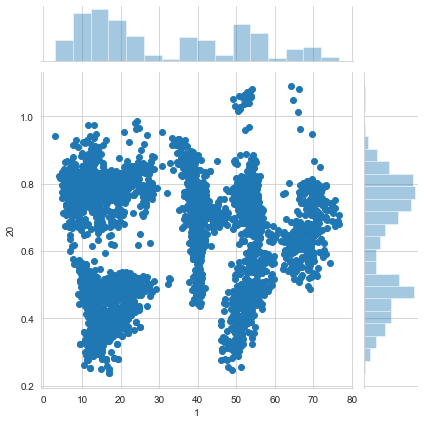

In [15]:
sns.jointplot(x=1, y=20,data=df)

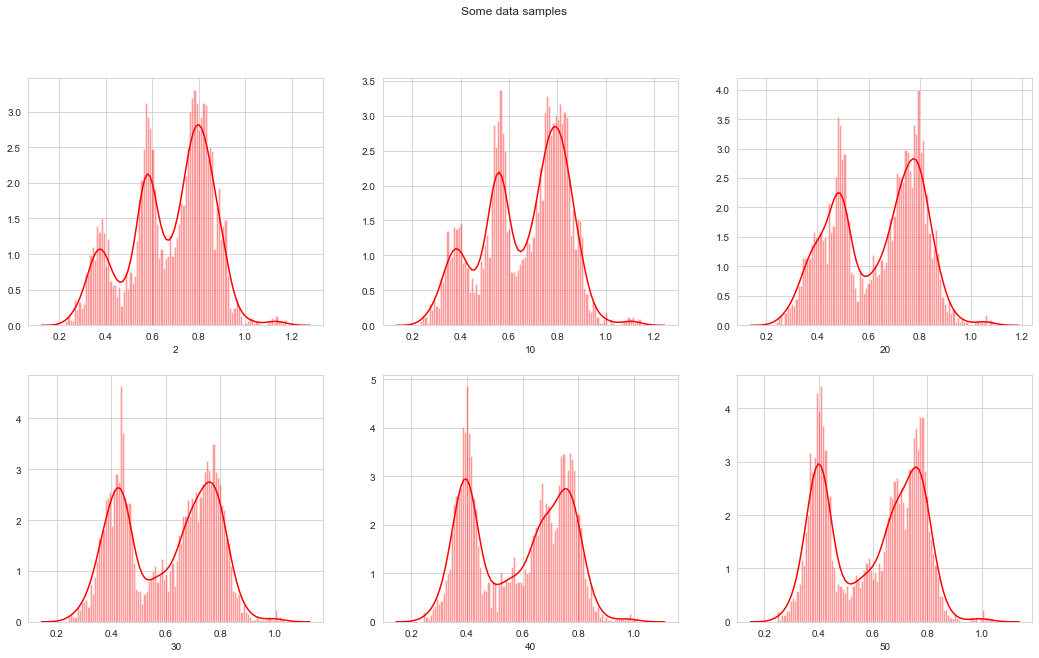

In [16]:
fig, axes0 = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Some data samples')
sns.distplot(df[2], bins=100, color='red',ax=axes0[0,0])
sns.distplot(df[10], bins=100, color='red',ax=axes0[0,1])
sns.distplot(df[20], bins=100, color='red',ax=axes0[0,2])
sns.distplot(df[30], bins=100, color='red',ax=axes0[1,0])
sns.distplot(df[40], bins=100, color='red',ax=axes0[1,1])
sns.distplot(df[50], bins=100, color='red',ax=axes0[1,2])

In [11]:
#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#fig.suptitle('Some data samples')
#sns.jointplot(x=1, y=2,data=df, kind='kde',ax=axes[0, 0])
#sns.jointplot(x=1, y=10,data=df, kind='kde',ax=axes[0, 1])
#sns.jointplot(x=1, y=20,data=df, kind='kde',ax=axes[0, 2])
#sns.jointplot(x=1, y=30,data=df, kind='kde',ax=axes[1, 0])
#sns.jointplot(x=1, y=40,data=df, kind='kde',ax=axes[1, 1])
#sns.jointplot(x=1, y=50,data=df, kind='kde',ax=axes[1, 2])

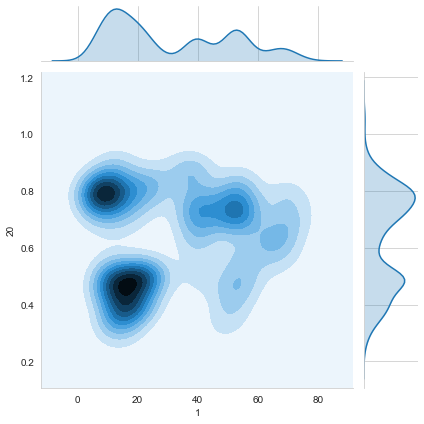

In [17]:
sns.jointplot(x=1, y=20,data=df, kind='kde')

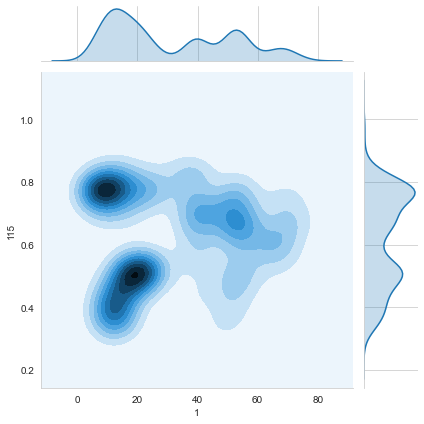

In [18]:
sns.jointplot(x=1, y=115,data=df, kind='kde')

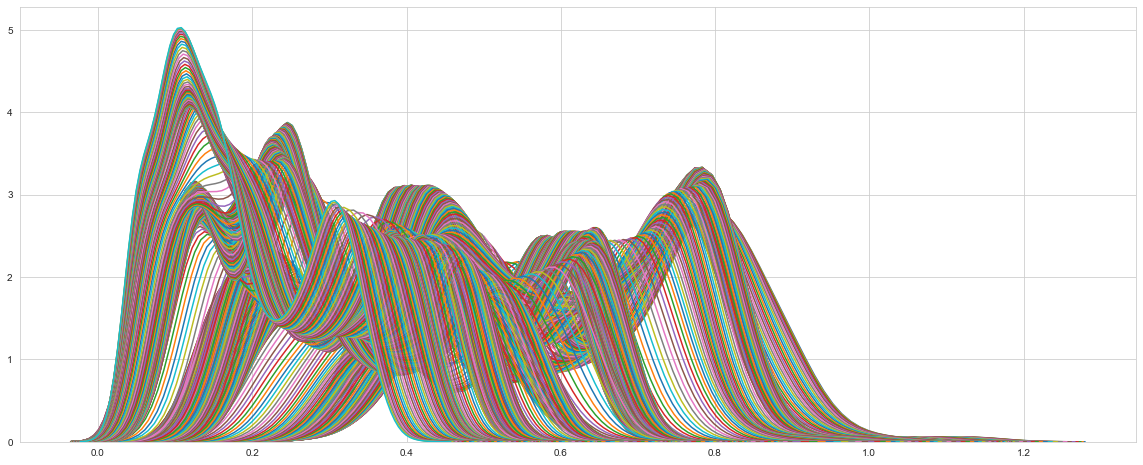

In [19]:
plt.figure(figsize=(20,8))
for i in range(2,682):
    #sns.distplot(df[i], bins=200)
    sns.kdeplot(df[i],legend=False)

In [20]:
#plt.figure(figsize=(20,8))
#for i in range(2,682):
#    sns.distplot(df[i], bins=100,kde=False, color='black')

<IPython.core.display.Javascript object>


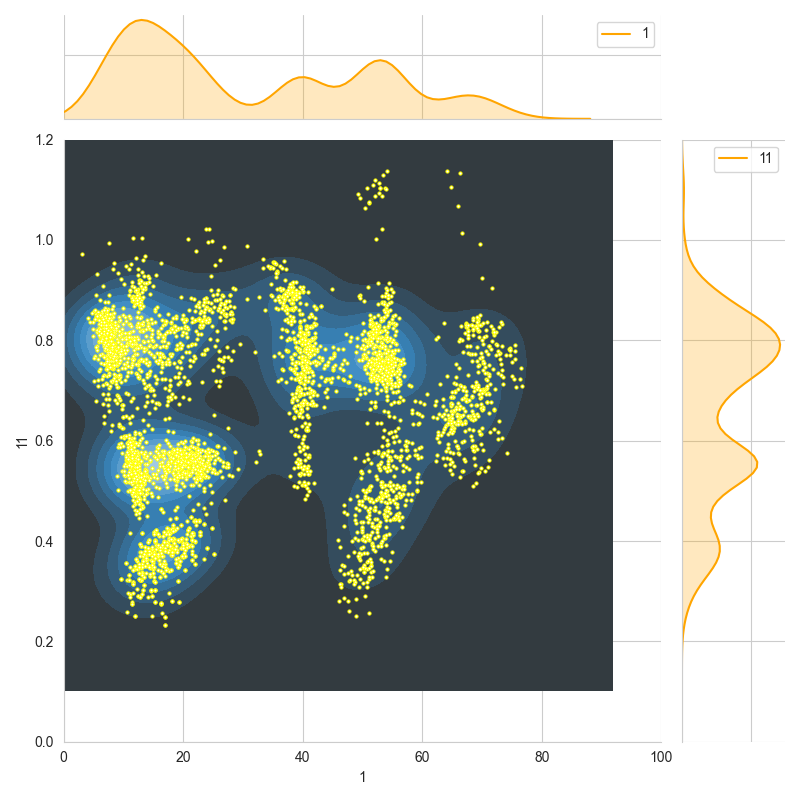

In [21]:
%matplotlib notebook
import matplotlib.animation
from IPython.display import HTML

def get_data(i=0):
    #x,y = np.random.normal(loc=i,scale=3,size=(2, 260))
    x=df[1]
    y=df[i+2]
    return x,y

x,y = get_data()
g = sns.JointGrid(x=x, y=y, height=8)
#lim = (-10,10)

def prep_axes(g, xlim, ylim):
    g.ax_joint.clear()
    g.ax_joint.set_xlim(xlim)
    g.ax_joint.set_ylim(ylim)
    g.ax_marg_x.clear()
    g.ax_marg_x.set_xlim(xlim)
    g.ax_marg_y.clear()
    g.ax_marg_y.set_ylim(ylim)
    plt.setp(g.ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_x.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_xticklabels(), visible=False)


def animate(i):
    g.x, g.y = get_data(i)
    prep_axes(g, (0, 100), (0, 1.2))
    #g.plot_joint(sns.kdeplot, cmap="Purples_d")
    g.plot_joint(sns.kdeplot, cmap="Blues_d", shade=True)
    g.plot_joint(sns.scatterplot,color="white", edgecolor="yellow",s=5)
    g.plot_marginals(sns.kdeplot, color="orange", shade=True)
    #g.annotate(scipy.stats.pearsonr)

#frames=np.sin(np.linspace(0,2*np.pi,17))*5
ani = matplotlib.animation.FuncAnimation(g.fig, animate, frames=10, repeat=False)
HTML(ani.to_jshtml())

plt.show()

## 6) Split the data into a training, a testing set and validation set

We'll split the data into 3 sets, one for training, one for testing and one for validating as 
the network is being trained and tested.


In [22]:
features = df.drop([0,1],axis=1)
targets = df[1]

split_frac = 0.8

## split the data into a training validation and test data (features, labels x and y)
split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = targets[:split_idx], targets[split_idx:]


test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:] 
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

# print out the shapes of your resultant data
print("\t\t\tfeature shapes:")
print("Train set: \t\t{}".format(train_x.shape),
     "\nValidation set: \t{}".format(val_x.shape), 
     "\nTest set: \t\t{}".format(test_x.shape))

			feature shapes:
Train set: 		(3126, 680) 
Validation set: 	(391, 680) 
Test set: 		(391, 680)


In [23]:
train_x.values

array([[0.59748155, 0.59597796, 0.59362256, ..., 0.11536655, 0.114876  ,
        0.11454818],
       [0.95419228, 0.95323746, 0.95200209, ..., 0.27413311, 0.27276811,
        0.27157426],
       [0.61113731, 0.60956609, 0.60743037, ..., 0.11221184, 0.11176399,
        0.11143245],
       ...,
       [0.26546129, 0.26655737, 0.26766371, ..., 0.05697601, 0.0568503 ,
        0.05681449],
       [0.63391583, 0.63270578, 0.63115627, ..., 0.10560846, 0.10565975,
        0.10576352],
       [0.46588551, 0.46612983, 0.46630106, ..., 0.10845628, 0.10824579,
        0.10808609]])

# 7) Dataloaders and Batching

In [24]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x.values).float(), torch.from_numpy(train_y.values).float())
valid_data = TensorDataset(torch.from_numpy(val_x.values).float(), torch.from_numpy(val_y.values).float())
test_data = TensorDataset(torch.from_numpy(test_x.values).float(), torch.from_numpy(test_y.values).float())

# dataloaders
batch_size = 128

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

In [25]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([128, 680])
Sample input: 
 tensor([[0.7809, 0.7797, 0.7782,  ..., 0.1540, 0.1534, 0.1529],
        [0.5719, 0.5720, 0.5716,  ..., 0.0563, 0.0561, 0.0560],
        [0.7923, 0.7924, 0.7924,  ..., 0.3591, 0.3575, 0.3557],
        ...,
        [0.5604, 0.5585, 0.5560,  ..., 0.0911, 0.0907, 0.0904],
        [0.8729, 0.8713, 0.8694,  ..., 0.1195, 0.1187, 0.1179],
        [0.7855, 0.7840, 0.7823,  ..., 0.1488, 0.1485, 0.1483]])

Sample label size:  torch.Size([128])
Sample label: 
 tensor([55.5172, 16.1700, 11.2300, 23.0674, 54.7646, 18.9200, 16.4277, 11.9700,
        70.6925, 56.8747,  9.2600, 38.6585, 27.5500, 53.7585, 53.5260, 21.4100,
        32.2100,  9.4000, 71.0347, 19.9300, 39.1365, 19.4695, 71.5338, 18.3980,
        53.0286, 21.8900, 20.2600, 22.2400, 11.1500, 13.6847, 49.4767, 38.8404,
         7.6400, 18.2281, 12.3600, 39.6255, 68.2528, 65.1962, 39.8042, 27.1476,
        12.7101, 37.9611, 49.4721, 54.2334, 18.7000,  8.2000, 41.0710,  5.3059,
        

## 8) Definition of the Network Architecture

Below are building our network. We've built out the structure. 
We are implementing both the forward pass then use backwards pass through the network. 
You'll also set the hyperparameters: the learning rate, the number of hidden units

<img src="neural_network.jpeg" width=600px>

The network has an input layer, 2 hidden layers and an output layer. The hidden layers will use the 
relu function for activations. The output layer has only one node and is used for the regression.

We work through each layer of our network calculating the outputs for each neuron. All of the 
outputs from one layer become inputs to the neurons on the next layer. This process is called 
*forward propagation*.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 2000
        hidden_2 = 2000
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(680, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 1)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)
    

Fully connected layers with 2 hidden layers and we used relu activation functions and also used dropout layers 
to generalize better and to increase the effect of individual neurons and also reduce the overfitting effects.

## 9) Specify Loss Function and Optimizer

In [27]:
class RMSELoss(nn.Module):
    def __init__(self, eps=1e-8):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self,yhat,y):
        loss = torch.sqrt(self.mse(yhat,y) + self.eps)
        return loss

In [28]:
class R_Squared(nn.Module):
    def __init__(self, eps=1e-8):
        super().__init__()
        self.mse = nn.MSELoss()
        self.eps = eps
        
    def forward(self,yhat,y):
        loss = 1 - (self.mse(yhat,y) / self.mse(y, torch.mean(y)*torch.ones(y.size(0))))   #self.mse(y,torch.mean(y)))
        return loss

In [29]:
# specify loss function (categorical cross-entropy)
#criterion = nn.MSELoss()
criterion_RMSE = RMSELoss()
criterion_Rsq=R_Squared()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

## 10) Training the Network define above

The steps for training/learning from a batch of data are described in the following steps:

* Clear the gradients of all optimized variables
* Forward pass: compute predicted outputs by passing inputs to the model
* Calculate the loss
* Backward pass: compute gradient of the loss with respect to model parameters
* Perform a single optimization step (parameter update)
* Update average training loss

The following loop trains for 400 epochs; take a look at how the values for the training loss 
decrease over time. We want it to decrease while also avoiding overfitting the training data.

In [30]:
# number of epochs to train the model
n_epochs = 400

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion_RMSE(output.view(-1), target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
        
    ######################    
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion_RMSE(output.view(-1), target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, train_loss,valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss
    #print('Lossssssss: ', train_loss/len(train_loader.sampler))

    # print training/validation statistics 
    # calculate average loss over an epoch
    #train_loss = train_loss/len(train_loader.sampler)
        
    #print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch+1, train_loss))
    
    #torch.save(model.state_dict(), 'model.pt')

Epoch: 1 	Training Loss: 31.397986 	Validation Loss: 23.422407
Validation loss decreased (inf --> 23.422407).  Saving model ...
Epoch: 2 	Training Loss: 22.975897 	Validation Loss: 23.216448
Validation loss decreased (23.422407 --> 23.216448).  Saving model ...
Epoch: 3 	Training Loss: 22.100610 	Validation Loss: 21.877871
Validation loss decreased (23.216448 --> 21.877871).  Saving model ...
Epoch: 4 	Training Loss: 21.181340 	Validation Loss: 20.684803
Validation loss decreased (21.877871 --> 20.684803).  Saving model ...
Epoch: 5 	Training Loss: 19.916054 	Validation Loss: 19.147620
Validation loss decreased (20.684803 --> 19.147620).  Saving model ...
Epoch: 6 	Training Loss: 18.318543 	Validation Loss: 17.496272
Validation loss decreased (19.147620 --> 17.496272).  Saving model ...
Epoch: 7 	Training Loss: 16.847377 	Validation Loss: 16.139606
Validation loss decreased (17.496272 --> 16.139606).  Saving model ...
Epoch: 8 	Training Loss: 16.053467 	Validation Loss: 15.668892
Valid

Epoch: 74 	Training Loss: 4.350192 	Validation Loss: 3.911344
Epoch: 75 	Training Loss: 4.630200 	Validation Loss: 4.109932
Epoch: 76 	Training Loss: 4.388003 	Validation Loss: 3.943424
Epoch: 77 	Training Loss: 4.261251 	Validation Loss: 3.879631
Epoch: 78 	Training Loss: 4.350300 	Validation Loss: 4.099078
Epoch: 79 	Training Loss: 4.225600 	Validation Loss: 3.737964
Validation loss decreased (3.866293 --> 3.737964).  Saving model ...
Epoch: 80 	Training Loss: 4.111892 	Validation Loss: 3.780538
Epoch: 81 	Training Loss: 4.196763 	Validation Loss: 3.771668
Epoch: 82 	Training Loss: 4.076087 	Validation Loss: 3.802532
Epoch: 83 	Training Loss: 4.235978 	Validation Loss: 3.764573
Epoch: 84 	Training Loss: 4.068666 	Validation Loss: 3.832860
Epoch: 85 	Training Loss: 4.124231 	Validation Loss: 3.658678
Validation loss decreased (3.737964 --> 3.658678).  Saving model ...
Epoch: 86 	Training Loss: 4.031524 	Validation Loss: 3.656446
Validation loss decreased (3.658678 --> 3.656446).  Savi

Epoch: 176 	Training Loss: 3.299882 	Validation Loss: 3.477417
Epoch: 177 	Training Loss: 3.262629 	Validation Loss: 3.133726
Epoch: 178 	Training Loss: 3.251741 	Validation Loss: 3.044386
Epoch: 179 	Training Loss: 3.672708 	Validation Loss: 3.472805
Epoch: 180 	Training Loss: 3.518953 	Validation Loss: 3.142596
Epoch: 181 	Training Loss: 3.395293 	Validation Loss: 3.538324
Epoch: 182 	Training Loss: 3.361015 	Validation Loss: 3.014795
Validation loss decreased (3.036956 --> 3.014795).  Saving model ...
Epoch: 183 	Training Loss: 3.511660 	Validation Loss: 3.555979
Epoch: 184 	Training Loss: 3.552321 	Validation Loss: 3.205463
Epoch: 185 	Training Loss: 3.367300 	Validation Loss: 2.997577
Validation loss decreased (3.014795 --> 2.997577).  Saving model ...
Epoch: 186 	Training Loss: 3.307839 	Validation Loss: 3.009226
Epoch: 187 	Training Loss: 3.356166 	Validation Loss: 3.269561
Epoch: 188 	Training Loss: 3.334063 	Validation Loss: 3.310905
Epoch: 189 	Training Loss: 3.426085 	Valida

Epoch: 286 	Training Loss: 2.715057 	Validation Loss: 2.450546
Validation loss decreased (2.488884 --> 2.450546).  Saving model ...
Epoch: 287 	Training Loss: 2.756843 	Validation Loss: 2.453881
Epoch: 288 	Training Loss: 2.843709 	Validation Loss: 2.591243
Epoch: 289 	Training Loss: 2.878382 	Validation Loss: 2.743729
Epoch: 290 	Training Loss: 2.783367 	Validation Loss: 2.598531
Epoch: 291 	Training Loss: 2.921861 	Validation Loss: 2.991399
Epoch: 292 	Training Loss: 2.826854 	Validation Loss: 2.412617
Validation loss decreased (2.450546 --> 2.412617).  Saving model ...
Epoch: 293 	Training Loss: 2.746131 	Validation Loss: 2.865077
Epoch: 294 	Training Loss: 2.798938 	Validation Loss: 2.916533
Epoch: 295 	Training Loss: 2.854107 	Validation Loss: 2.370742
Validation loss decreased (2.412617 --> 2.370742).  Saving model ...
Epoch: 296 	Training Loss: 2.650996 	Validation Loss: 2.416073
Epoch: 297 	Training Loss: 2.683779 	Validation Loss: 2.447215
Epoch: 298 	Training Loss: 2.889686 	

Epoch: 396 	Training Loss: 2.452070 	Validation Loss: 2.260764
Epoch: 397 	Training Loss: 2.305651 	Validation Loss: 1.913139
Validation loss decreased (1.934684 --> 1.913139).  Saving model ...
Epoch: 398 	Training Loss: 2.420749 	Validation Loss: 2.642467
Epoch: 399 	Training Loss: 2.348592 	Validation Loss: 1.930203
Epoch: 400 	Training Loss: 2.431792 	Validation Loss: 1.896933
Validation loss decreased (1.913139 --> 1.896933).  Saving model ...


## 11) Load the model with the lowest validation loss

In [31]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

## 12) Test the trained Network

In [32]:
# initialize lists to monitor test loss and accuracy
#test_loss = 0.0
R_squared_test_loss = 0.0
RMSE_test_loss = 0.0
predictions= np.array([])


model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    RMSE_loss = criterion_RMSE(output.view(-1), target)
    R_squared_loss = criterion_Rsq(output.view(-1), target)
    # update test loss 
    #test_loss += loss.item()*data.size(0)
    RMSE_test_loss += RMSE_loss.item()*data.size(0)
    R_squared_test_loss += R_squared_loss.item()*data.size(0)
    #print(output)
    predictions = np.concatenate((predictions, output.detach().numpy().reshape(-1)),axis=0)


# calculate and print avg test loss
#test_loss = test_loss/len(test_loader.sampler)
RMSE_test_loss = RMSE_test_loss/len(test_loader.sampler)
R_squared_test_loss = R_squared_test_loss/len(test_loader.sampler)
#print('Test Loss: {:.6f}\n'.format(test_loss))
print('R squared Test Loss:\t {:.6f}\n'.format(R_squared_test_loss))
print('RMSE Test Loss:\t\t {:.6f}\n'.format(RMSE_test_loss))



R squared Test Loss:	 0.989802

RMSE Test Loss:		 1.994447



**RMSE (Root Mean Squared Error)** 
* is the error rate by the square root of MSE.


In [33]:
print('RMSE Test Loss:\t\t {:.6f}\n'.format(RMSE_test_loss))

RMSE Test Loss:		 1.994447



**R-squared (Coefficient of determination)**

* represents the coefficient of how well the values fit compared to the original values. 
The value from 0 to 1 interpreted as percentages. The higher the value is, the better 
the model is.

* we get for our model an result of: 

In [34]:
print('R squared for our model is :\t {:.6f}\n'.format(R_squared_test_loss))

R squared for our model is :	 0.989802



## 13) Comparision between the Predicted Values and Test Values

<IPython.core.display.Javascript object>


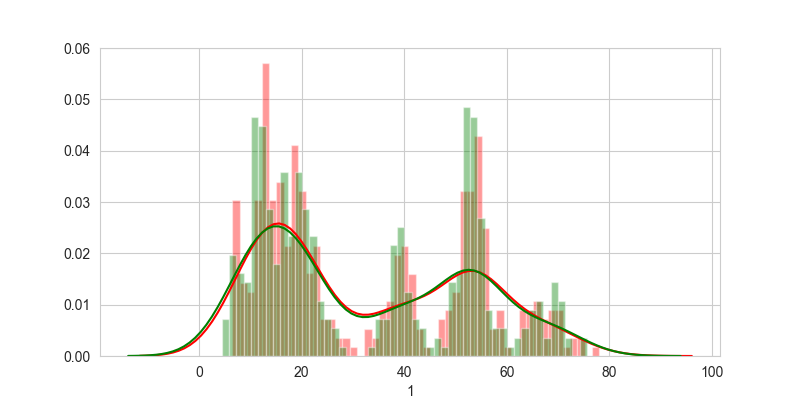

In [35]:
fig = plt.figure(figsize=(8,4))
#plt.plot(range(len(predictions)), predictions)
#plt.plot(range(len(test_y)), test_y)
#plt.show()
sns.distplot(predictions, bins=50, color='red')
sns.distplot(test_y, bins=50, color='green')

<IPython.core.display.Javascript object>


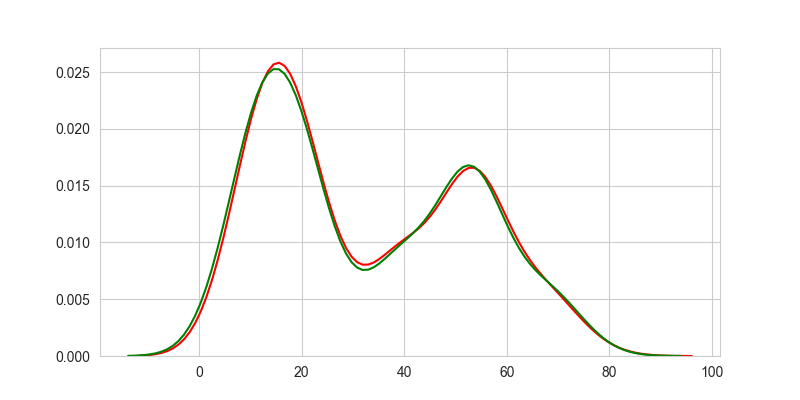

In [36]:
fig = plt.figure(figsize=(8,4))
#plt.plot(range(len(predictions)), predictions)
#plt.plot(range(len(test_y)), test_y)
#plt.show()
#sns.distplot(predictions, bins=50, color='red')
#sns.distplot(test_y, bins=50, color='green')
sns.kdeplot(predictions,legend=False,color='red')
sns.kdeplot(test_y,legend=False, color='green')